## Task 1

## Task 2

In [3]:
import Jupiter as jp
import pandas as pd
import numpy as np

def Kippler(row):
    jupiter_mass =np.sqrt(((row["distance_km"]**3)*4*(np.pi)**2)/((row["period_days"]**2)*(6.67*10**-11)))

    return jupiter_mass

connectable = f"sqlite:///jupiter.db"
Query = ("SELECT * FROM moons")

moons_df = pd.read_sql(Query, connectable, index_col="moon")
moons_df["predicted_mass"] = moons_df.apply(Kippler, axis=1)
moons_df["T^2"] = (moons_df["period_days"]*86400)**2
moons_df["a^3"] = (moons_df["distance_km"]*1000)**3

jupiter = jp.Moons
jupiter.model()
jupiter.plot()

TypeError: Moons.model() missing 1 required positional argument: 'self'

In [ ]:
from sklearn import linear_model

model = linear_model.LinearRegression(fit_intercept=True)

X = moons_df[["a^3"]]
Y = moons_df["T^2"]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)


model.fit(x_train,y_train)

pred_T2 = model.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
print(f"The R2 score is: {r2_score(y_test,pred_T2)}")
print(f"The RMSE score is: {mean_squared_error(y_test,pred_T2, squared=True)}")



The R2 score is: 0.9874698094589166
The RMSE score is: 3.9427519223478177e+28


Text(0, 0.5, 'T^2')

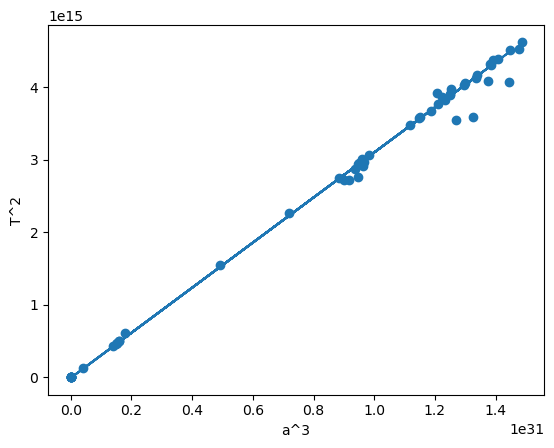

In [ ]:
import matplotlib.pyplot as plt

fig, ax  = plt.subplots()

#Create a scatter plot of the known a^3-T^2 values
ax.scatter(moons_df["a^3"],moons_df["T^2"])

#Draw line to represent the predicted T^2-values
ax.plot(x_test,pred_T2)

# Axis labels
ax.set_xlabel("a^3")
ax.set_ylabel("T^2")

In [ ]:
M = (4* np.pi**2) / (model.coef_[0]*6.67e-11)

print(f"The mass of jupiter is predicted to be {M}Kg")

The mass of jupiter is predicted to be 1.9045035734306243e+27Kg
